Setup

In [2]:
# Code inspired by Alexandre Gramfort <alexandre.gramfort@inria.fr>, License: BSD 3 clause

# Python ≥3.7 is required
import sys
assert sys.version_info >= (3, 7)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "1.0"
print('The scikit-learn version is {}.'.format(sklearn.__version__))



from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc

from sklearn import linear_model
from sklearn.svm import l1_min_c
from sklearn.preprocessing import label_binarize #one-vs-all scheme
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#access drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial

x_path= "/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial/clean_data/XoheImp.csv"
y_path= "/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial/clean_data/Y.csv"

The scikit-learn version is 1.0.2.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial


In [3]:
#Set X and y values
X = pd.read_csv(x_path)
y = pd.read_csv(y_path)

Recoding Y as a binary variable with mobile money = 1 and the rest = 0

In [ ]:
#yb = label_binarize(["b'Mobile money transfer (M-PESA, Airtel Money, Orange Money, Yu Cash, Tangaza, etc)'"], classes= y['trx_mode_desc'])
#y = pd. DataFrame(yb) 
#y = y.transpose()

Splitting data into training and validation set

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

Creating a list of C values that will be used as tuning parameter

In [10]:
cs = 1 * np.logspace(0, 3, 6)

In [5]:
gc.collect()

185

Training models

In [6]:
print("Computing regularization path ...")
start = time()

pipe = Pipeline([('scaler', StandardScaler()), ('ridge', linear_model.LogisticRegression(random_state=0,
    warm_start=True, ))])

coefs_ = []

for c in cs:
    pipe.named_steps['ridge'].set_params(C=c)
    model = pipe.fit(X_train, y_train)
    Y_pred = model.predict(X_val)
    coefs_.append(metrics.matthews_corrcoef(y_val, Y_pred))
print("This took %0.3fs" % (time() - start))

Computing regularization path ...


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

This took 955.269s


Plotting and saving the graph

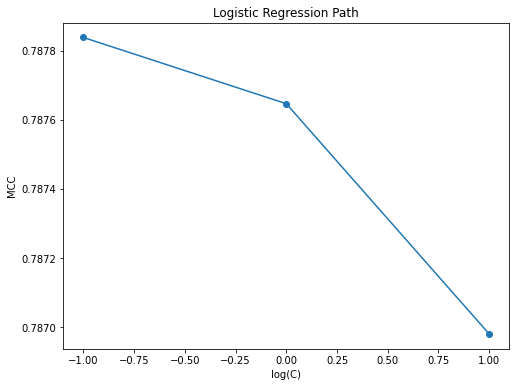

In [7]:
coefs_ = np.array(coefs_)

fig = plt.figure(figsize=(8,6))
plt.plot(np.log10(cs), coefs_, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("MCC")
plt.title("Logistic Regression Path")
plt.axis("tight")
plt.show()


fig.savefig('parameter_tuning_Ridge.png')


Findings: The max MCC is achieved at a C of 2.15443469e+02

In [11]:
cs

array([1.00000000e+00, 2.92864456e+00, 8.57695899e+00, 2.51188643e+01,
       7.35642254e+01, 2.15443469e+02, 6.30957344e+02, 1.84784980e+03,
       5.41169527e+03, 1.58489319e+04, 4.64158883e+04, 1.35935639e+05,
       3.98107171e+05, 1.16591440e+06, 3.41454887e+06, 1.00000000e+07])